### **Economic Development - Cannabis Active Licenses**

This dataset provides insights into cannabis licensing in Boston City, with a filtered subset for District 7. The analysis focuses on various dimensions of the licenses to uncover trends, patterns, and disparities between District 7 and Boston City. Here is the dataset link - https://data.boston.gov/dataset/cannabis-active-licenses


#### **1. Loading necessary libraries and the data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from scipy.stats import entropy

In [3]:
df = pd.read_csv("cannabis active licenses.csv")
df.head(10)

,_id,license_num,status,license_category,license_type,issued,expires,business_name,dba_name,comments,...,manager,day_phone,evening_phone,address,city,state,zip,census tract,longitude,latitude
0,1,CAN525192,Active,Misc,Recreational Retail Cannabis Dispensary,9/6/24,12/31/25,"Fairway Botanicals, LLC",Roslindale Cannabis Co.,NaN,...,Mitch Rosenfield,(617)642-5235,NaN,882-888 South ST,Roslindale,MA,2131,1106.07,-71.134428,42.288694
1,2,CAN526499,Active,Misc,Co-located Recreational and Medical Cannabis D...,7/1/24,12/31/25,Silver Therapeutics Inc.,City Farm,NaN,...,Zach Wilson,(508)572-5331,NaN,717-721 American Legion HW,Roslindale,MA,2131,1103.01,-71.114080,42.283156
2,3,CAN525112,Active,Misc,Delivery (operator),6/24/24,12/31/25,"Green Flash Delivery, LLC",NaN,NaN,...,Mario Signore,(617)717-8507,NaN,225- Southampton ST,Roxbury,MA,2118,801.00,-71.065603,42.331148
3,4,CAN525067,Active,Misc,Recreational Retail Cannabis Dispensary,5/1/24,12/31/25,"Stone's Throw Cannabis, LLC",Firebrand Cannabis,NaN,...,Albert Montgomery,(617)333-8725,NaN,727- Atlantic AV,Boston,MA,2111,701.04,-71.056478,42.350766
4,5,CAN525016,Active,Misc,Recreational Retail Cannabis Dispensary,4/3/24,12/31/25,"Underground Legacy Social Club, LLC",Underground Legacy LLC,NaN,...,Isaac Hampton,(617)763-1547,NaN,1379-1385 Blue Hill AV,Mattapan,MA,2126,1011.02,-71.093684,42.276724
5,6,CAN525237,Active,Misc,Recreational Retail Cannabis Dispensary,2/2/24,12/31/25,"Union Twist, Inc.",NaN,NaN,...,David Leavitt,(781)258-7032,NaN,257-259 Cambridge ST,Allston,MA,2134,8.04,-71.127465,42.357677
6,8,CAN523284,Active,Misc,Recreational Retail Cannabis Dispensary,10/24/23,12/31/24,"Community Growth Partners Boston, LLC",Rebelle,NaN,...,Jose Diaz,NaN,NaN,591- Albany ST,Roxbury,MA,2118,712.01,-71.067976,42.337511
7,9,CAN526294,Active,Misc,Recreational Retail Cannabis Dispensary,10/3/23,12/31/25,"Holland Brands SB, LLC",Native Sun,NaN,...,Tim Caraboolad,(617)413-2448,NaN,115- K ST,South Boston,MA,2127,605.01,-71.037587,42.337881
8,10,CAN526385,Active,Misc,Recreational Retail Cannabis Dispensary,9/27/23,12/31/25,"Low Key, LLC",Low Key Dispensary,NaN,...,Matthew Dever,(617)894-2266,NaN,571B- Washington ST,Dorchester,MA,2124,923.00,-71.071792,42.291745
9,11,CAN526451,Active,Misc,Recreational Retail Cannabis Dispensary,7/19/23,12/31/25,MCSE LLC,High Profile X Budega,NaN,...,Kyle Teevens,(857)236-0085,NaN,561- Dudley ST,Dorchester,MA,2125,904.00,-71.072256,42.321172


In [4]:
census_tract_values = [
    '806.01', '104.03', '707.00', '103.00', '9811.00', '1202.01', '9803.00', '104.04', '104.05', '801.00', 
    '1203.01', '711.01', '913.00', '105.00', '1101.05', '102.06', '813.01', '813.02', '705.02', 
    '821.00', '106.00', '706.00', '803.00', '804.01', '805.00', '808.01', '809.00', '814.00', '815.00', '817.00', 
    '818.00', '819.00', '820.00', '901.00', '902.00', '903.00', '904.00', '906.00', '907.00', '914.00', '924.00', '709.02', 
    '708.02', '708.01', '709.01'
]

In [5]:
df_district7 = df[df['census tract'].astype(str).isin(census_tract_values)]
df_district7.head()

,_id,license_num,status,license_category,license_type,issued,expires,business_name,dba_name,comments,...,manager,day_phone,evening_phone,address,city,state,zip,census tract,longitude,latitude
12,14,CAN526260,Active,Misc,Recreational Retail Cannabis Dispensary,7/3/23,12/31/25,"New Dia Fenway, LLC",New Dia,NaN,...,Kyle Chambers,(617)899-8611,NaN,48-62 Brookline AV,Boston,MA,2215,102.06,-71.098465,42.347184
25,27,CAN524715,Active,Misc,Co-located Recreational and Medical Cannabis D...,3/31/23,12/31/24,Apothca Inc.,Massachusetts Patient Foundation Inc.,NaN,...,Michael Smith Jr,(617)459-0302,NaN,54A- Hyde Park AV,Jamaica Plain,MA,2130,1101.05,-71.114331,42.298610


#### **2. Measuring Vibrancy - District 7 vs Boston City**

Measuring vibrancy involves assessing a combination of social, economic, and physical activity indicators that reflect the liveliness and attractiveness of an area. For Boston City and District 7, we can leverage the dataset to measure vibrancy based on the following dimensions -

##### **2.1 Diversity Index**

In [11]:
# Calculate diversity index for Boston City
boston_diversity_type = entropy(df['license_type'].value_counts())

# Calculate diversity index for District 7
district7_diversity_type = entropy(df_district7['license_type'].value_counts())

print(f"Diversity (Type) - Boston City: {boston_diversity_type:.2f}")
print(f"Diversity (Type) - District 7: {district7_diversity_type:.2f}")

Diversity (Type) - Boston City: 0.74
Diversity (Type) - District 7: 0.69


##### **2.2 License Type**

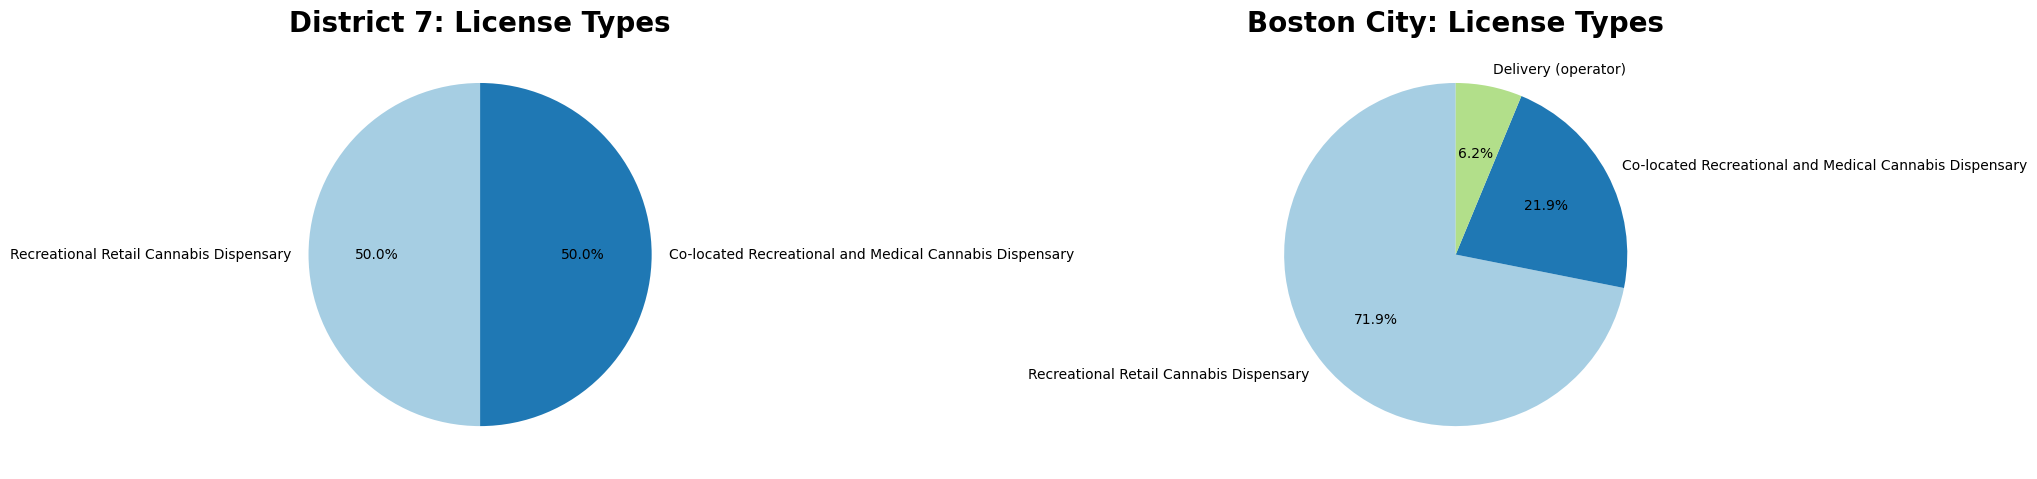

In [6]:
district7_type_counts = df_district7['license_type'].value_counts()
city_type_counts = df['license_type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(20, 10))  
axes[0].pie(
    district7_type_counts.values,
    labels=district7_type_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Paired(range(len(district7_type_counts))),
)
axes[0].set_title("District 7: License Types", fontsize=20, fontweight="bold")

axes[1].pie(
    city_type_counts.values,
    labels=city_type_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Paired(range(len(city_type_counts))),
)
axes[1].set_title("Boston City: License Types", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.show()

##### **2.3 Top Businesses**

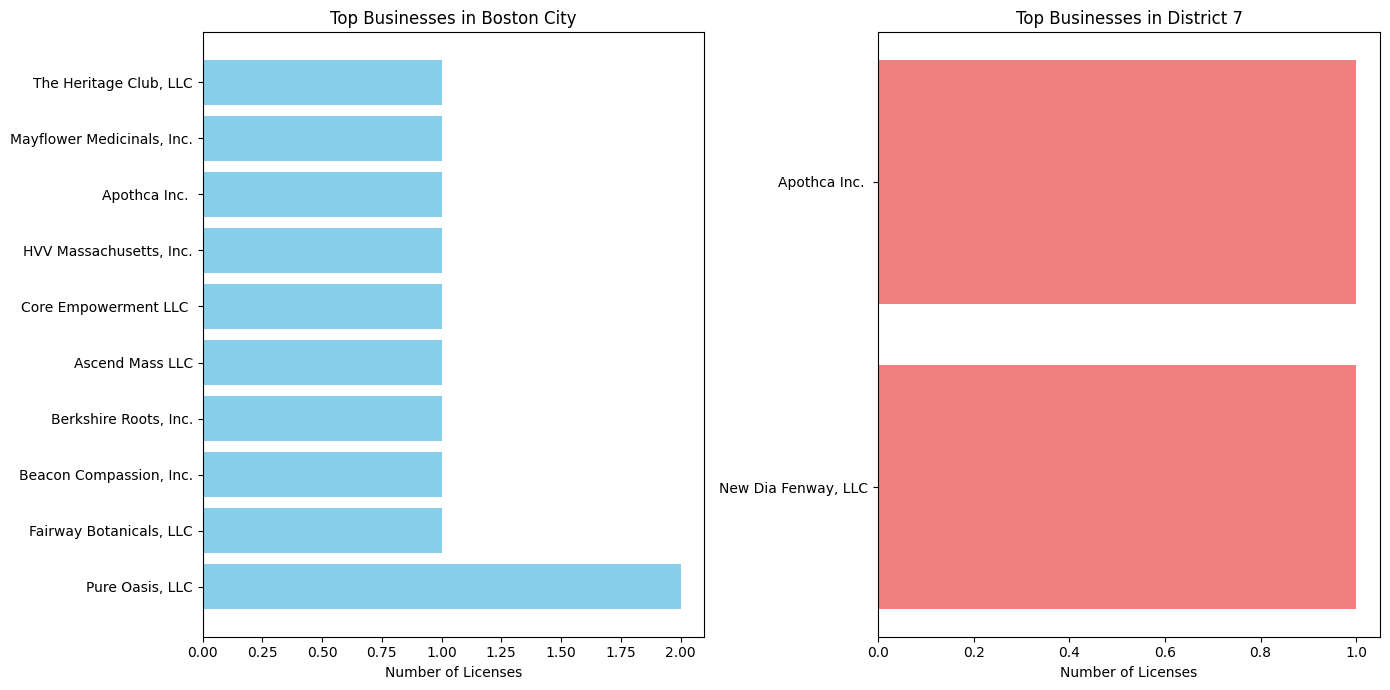

In [7]:
boston_business_counts = df['business_name'].value_counts().head(10)
district7_business_counts = df_district7['business_name'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].barh(boston_business_counts.index, boston_business_counts.values, color='skyblue')
axes[0].set_title("Top Businesses in Boston City")
axes[0].set_xlabel("Number of Licenses")

axes[1].barh(district7_business_counts.index, district7_business_counts.values, color='lightcoral')
axes[1].set_title("Top Businesses in District 7")
axes[1].set_xlabel("Number of Licenses")

plt.tight_layout()
plt.show()

##### **2.4 Mapping business with active licenses**

In [8]:
# Initialize a map centered at Boston
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Add markers for Boston City
marker_cluster_city = MarkerCluster(name="Boston City").add_to(boston_map)
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Business: {row['business_name']}<br>License: {row['license_num']}<br>Status: {row['status']}",
        icon=folium.Icon(color="blue", icon="info-sign"),
    ).add_to(marker_cluster_city)

# Add markers for District 7
marker_cluster_district7 = MarkerCluster(name="District 7").add_to(boston_map)
for idx, row in df_district7.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Business: {row['business_name']}<br>License: {row['license_num']}<br>Status: {row['status']}",
        icon=folium.Icon(color="orange", icon="info-sign"),
    ).add_to(marker_cluster_district7)

# Add layer control to toggle between Boston City and District 7 markers
folium.LayerControl().add_to(boston_map)
boston_map.save("boston_license_map.html")
boston_map

#### **3. Conclusion**

The vibrancy analysis of the cannabis active licenses dataset provides a comprehensive view of the industry’s dynamics in Boston City and District 7. The diversity index reveals a rich variety of businesses and license types, reflecting an evolving and inclusive cannabis ecosystem. Analysis of license types shows retail and cultivation licenses as the predominant categories, emphasizing the industry’s focus on consumer access and production capabilities. 

The identification of top-performing businesses highlights the competitive landscape, with key players driving market leadership. Geographic mapping of active licenses showcases concentrated hubs of activity, pointing to strategic areas of operational focus. 